<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Features_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Features Preparation**

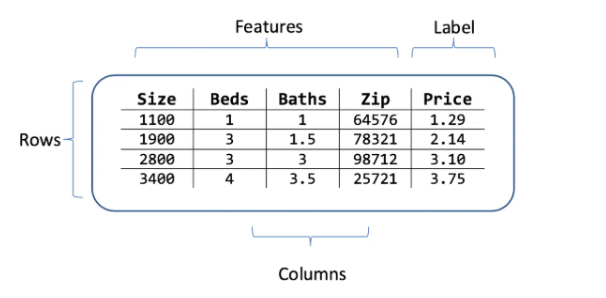

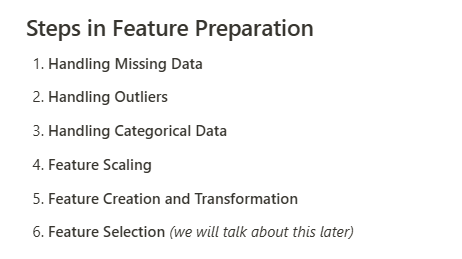